<a href="https://colab.research.google.com/github/NorrisPau/MachineLearning_Class_NoraPauelsen/blob/main/BERT_Topic_Modeling_create_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [23]:
from google.colab import drive

In [24]:
root_path = "/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien"

In [25]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Read in Data

In [ ]:
!pip install bertopic

In [ ]:
!pip install matplotlib

In [7]:
import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn
import matplotlib as plt
import nltk
nltk.download('stopwords')
from bertopic import BERTopic

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
from sentence_transformers import SentenceTransformer

In [33]:
raw_data = pd.read_csv("/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien/data/raw/okcupid_profiles.csv")

In [34]:
raw_data

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59941,59,single,f,straight,NaN,NaN,socially,never,graduated from college/university,NaN,...,"vibrant, expressive, caring optimist. i love b...",the happiest times have been when life came to...,i make an outstanding osso bucco. i am also ve...,"i am told that people notice my smile, eyes an...",i am an avid movie watcher and follow the broa...,"my family, my dog, italy, words and music!",writing my book.,"running with my dog, finishing up the work wee...",i have a dream to sing at the alconquin in nyc...,you are seeking a long term connection of shar...
59942,24,single,m,straight,fit,mostly anything,often,sometimes,working on college/university,"white, other",...,i'm nick. i never know what to write about mys...,currently finishing school for film production...,"filmmaking, photography, graphic design, web d...","dude, i don't know.","movies: hook (the greatest adventure ever!), g...",iphone contact lenses headphones camera tv rem...,i do most of my thinking on the bus to/from wo...,"bringin' home bacon, or drinking and shakin'!",when i was 18 i got a tattoo of waldo somewher...,meh if you made it this far you might as well.
59943,42,single,m,straight,average,mostly anything,not at all,never,graduated from masters program,asian,...,"hello! i enjoy traveling, watching movies, and...","i'm a civil engineer, who enjoys helping the c...",- looking at things objectively - getting thin...,i'm quiet until i get used to the environment ...,"last book: ""game change"". movies

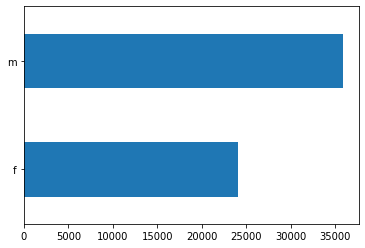

In [117]:
raw_data.sex.value_counts().sort_values().plot(kind = 'barh')

In [35]:
#Extract essay 0 (about me) to a list
df = raw_data[raw_data.essay0.notnull()]
docs = list(df["essay0"]) #Make dataset to list

In [36]:
len(docs)

54458

# Get topic probabilities 

In [86]:
# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

In [87]:
# create model
sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
topic_model = BERTopic(embedding_model=sentence_model, 
                       calculate_probabilities=True, 
                       vectorizer_model=vectorizer_model, #this should remove stopwords
                       verbose=True)
#topic_model = BERTopic(top_n_words=20, language="english", calculate_probabilities=True, verbose=True)

In [88]:
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/1702 [00:00<?, ?it/s]

2022-06-08 15:02:15,812 - BERTopic - Transformed documents to Embeddings
2022-06-08 15:03:26,983 - BERTopic - Reduced dimensionality
2022-06-08 15:07:26,780 - BERTopic - Clustered reduced embeddings


In [89]:
df_probs = pd.DataFrame(probs)

In [90]:
df_probs #248 topics

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
0,0.002899,0.002406,0.003152,0.003018,0.005057,0.004747,0.003091,0.003385,0.004247,0.002223,...,0.004034,0.006335,0.003545,0.004583,0.005061,0.003559,0.004260,0.003373,0.006101,0.001452
1,0.007867,0.007386,0.003879,0.002542,0.003918,0.003415,0.002298,0.002492,0.002432,0.002078,...,0.003287,0.002893,0.006065,0.003519,0.002741,0.005393,0.003375,0.005193,0.002524,0.002857
2,0.002645,0.002816,0.002996,0.022680,0.003528,0.003272,0.006544,0.004964,0.003875,0.002557,...,0.003358,0.003697,0.003230,0.004766,0.007002,0.002929,0.005803,0.003419,0.004560,0.002395
3,0.015836,0.004937,0.003649,0.002089,0.002800,0.002638,0.001931,0.002114,0.001975,0.001542,...,0.002355,0.002308,0.004138,0.003113,0.002286,0.003329,0.002648,0.004020,0.002110,0.002749
4,0.001389,0.001166,0.001549,0.002553,0.002233,0.001655,0.002482,0.002308,0.002018,0.002322,...,0.001817,0.001939,0.001546,0.001579,0.001925,0.001406,0.001927,0.001439,0.001972,0.000920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54453,0.000820,0.000701,0.000798,0.000795,0.001413,0.001736,0.000832,0.000881,0.001705,0.000720,...,0.001509,0.003096,0.000943,0.001174,0.001442,0.001220,0.001087,0.000920,0.002440,0.000414
54454,0.003182,0.002883,0.002324,0.001830,0.001839,0.001693,0.001584,0.001572,0.001291,0.001204,...,0.001474,0.001485,0.002718,0.002289,0.001623,0.001889,0.002114,0.002704,0.001395,0.002630
54455,0.001802,0.008933,0.001046,0.001026,0.001091,0.001148,0.000823,0.000851,0.000803,0.000612,...,0.001042,0.000972,0.001709,0.001688,0.001146,0.001861,0.001385,0.002230,0.000926,0.001209
54456,0.005773,0.002688,0.004719,0.002290,0.007693,0.012233,0.003161,0.002514,0.004011,0.003328,...,0.003770,0.005816,0.006535,0.003415,0.002699,0.003887,0.002615,0.004305,0.003323,0.001530


In [91]:
df_probs["sum_probabilities"] = df_probs. sum(axis=1)

In [93]:
df_probs.loc[df_probs["sum_probabilities"]<0.5] #13,730 user profiles 

,0,1,2,3,4,5,6,7,8,9,...,239,240,241,242,243,244,245,246,247,sum_probabilities
5,0.000188,0.000104,0.000260,0.000107,0.000348,0.000156,0.000115,0.000147,0.000145,0.000104,...,0.000178,0.000185,0.000136,0.000131,0.000143,0.000156,0.000141,0.000147,0.000065,0.031072
10,0.000168,0.000123,0.000169,0.000157,0.000276,0.000198,0.000167,0.000194,0.000238,0.000511,...,0.000211,0.000158,0.000137,0.000160,0.000166,0.000165,0.000142,0.000194,0.000094,0.071026
14,0.000877,0.001691,0.000621,0.000622,0.000561,0.000601,0.000543,0.000484,0.000440,0.000403,...,0.000508,0.000885,0.000848,0.000575,0.000685,0.000681,0.001038,0.000481,0.001429,0.224677
16,0.000786,0.001204,0.000602,0.000683,0.000541,0.000516,0.000523,0.000535,0.000430,0.000402,...,0.000474,0.000699,0.000700,0.000574,0.000608,0.000732,0.000746,0.000477,0.003655,0.239663
19,0.001181,0.000891,0.001284,0.000750,0.001137,0.001357,0.001042,0.000674,0.000722,0.000634,...,0.000957,0.002687,0.001463,0.000765,0.000880,0.000813,0.001928,0.000751,0.000516,0.222310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54446,0.000912,0.001407,0.000638,0.000668,0.000552,0.000549,0.000529,0.000522,0.000431,0.000361,...,0.000490,0.000791,0.000812,0.000590,0.000631,0.000724,0.000895,0.000484,0.002035,0.223793
54448,0.001044,0.001269,0.000957,0.001835,0.001149,0.001188,0.001127,0.001317,0.001219,0.000728,...,0.001248,0.001122,0.002275,0.003917,0.001410,0.003046,0.001342,0.001691,0.000885,0.328886
54453,0.000820,0.000701,0.000798,0.000795,0.001413,0.001736,0.000832,0.000881,0.001705,0.000720,...,0.003096,0.000943,0.001174,0.001442,0.001220,0.001087,0.000920,0.002440,0.000414,0.239767
54455,0.001802,0.008933,0.001046,0.001026,0.001091,0.001148,0.000823,0.000851,0.000803,0.000612,...,0.000972,0.001709,0.001688,0.001146,0.001861,0.001385,0.002230,0.000926,0.001209,0.320321


In [94]:
probs.shape #248 topics for 54458 users 

(54458, 248)

In [96]:
topic_model.get_topic_info().head(10) #-1 topic is the most frequent one, it usually contains stopwords, but we removed them before, so it shows
#the most generic topic: love_like_life_people

,Topic,Count,Name
0,-1,42067,-1_love_like_life_people
1,0,601,0_artist_music_art_musician
2,1,400,1_travel_trip_europe_traveling
3,2,364,2_nerd_geek_nerdy_games
4,3,364,3_dating_online_online dating_site
5,4,358,4_laugh_humor_sense humor_funny
6,5,276,5_quotes_heart_quote_life
7,6,276,6_queer_gender_femme_bisexual
8,7,271,7_shy_know_shy know_im
9,8,265,8_loyal_sassy_smart_kind


In [110]:
df_topic_sex = pd.DataFrame({"Profile_text": docs,"most_probable_topic": topics, "Sex": df.sex})

In [112]:
df_topic_sex

,Profile_text,most_probable_topic,Sex
0,me: would love think kind intellectual: either...,-1,m
1,chef: means. 1. workaholic. 2. love cook regar...,64,m
2,"i'm ashamed much, writing public text online d...",-1,m
3,work library go school. . .,43,m
4,"hey how's going? currently vague profile know,...",-1,m
...,...,...,...
59941,"vibrant, expressive, caring optimist. love peo...",-1,f
59942,i'm nick. never know write myself. i'm sure ha...,-1,m
59943,"hello! enjoy traveling, watching movies, hangi...",-1,m
59944,"""all world balls integrity one take either awa...",-1,m


In [113]:
sex = list(df["sex"])

In [98]:
len(sex)

54458

# Topics per Class: Sex and Sexual Orientation

In [114]:
topics_per_class = topic_model.topics_per_class(docs, topics, classes=sex)

2it [00:11,  5.55s/it]


In [115]:
topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=50, width=900)

In [118]:
topic_model.visualize_hierarchy(top_n_topics=20, width=800)

In [121]:
#1. To save the target vector of sex per profile text in a dataframe (Y)
df_topic_sex.to_csv('/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien/data/processed/df_topics.csv', index=False)

In [122]:
#2. To save the feature vector: topic probabilities per profile text in a dataframe (X)
df_probs.to_csv(r'/content/gdrive/MyDrive/Machine_Learning_NLP_Nora_Pauelsen_TU_Wien/data/processed/df_probs.csv', index=False)